
# Classify images using CNNs
###### Based on Jupyter Notebook provided by Dr. Ryan Ahmed @STEMplicity, as part of the Udemy course "Build 8 Practical Projects and Go from Zero to Hero in Deep/Machine Learning, Artificial Neural Networks".

### 0. Problem Statement

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


### 1. Import libraries/Datasets

#### 1.1. Get the main libraries needed

In [4]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn # type: ignore

#### 1.2 Get the CIFA10 dataset

In [5]:
import tensorflow # type: ignore
from keras.datasets import cifar10 # type: ignore
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

#### 1.3 Getting training and test data shapes

In [6]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### 2. Visualize Data

[8]


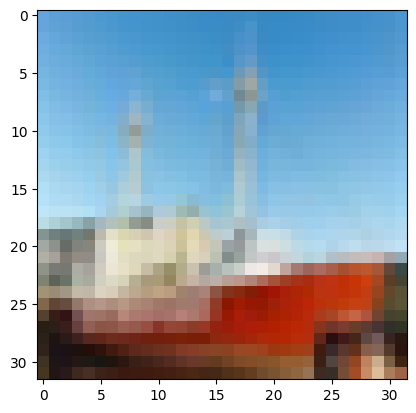

In [15]:
i = 1032
plt.imshow(X_train[i])
print(y_train[i])

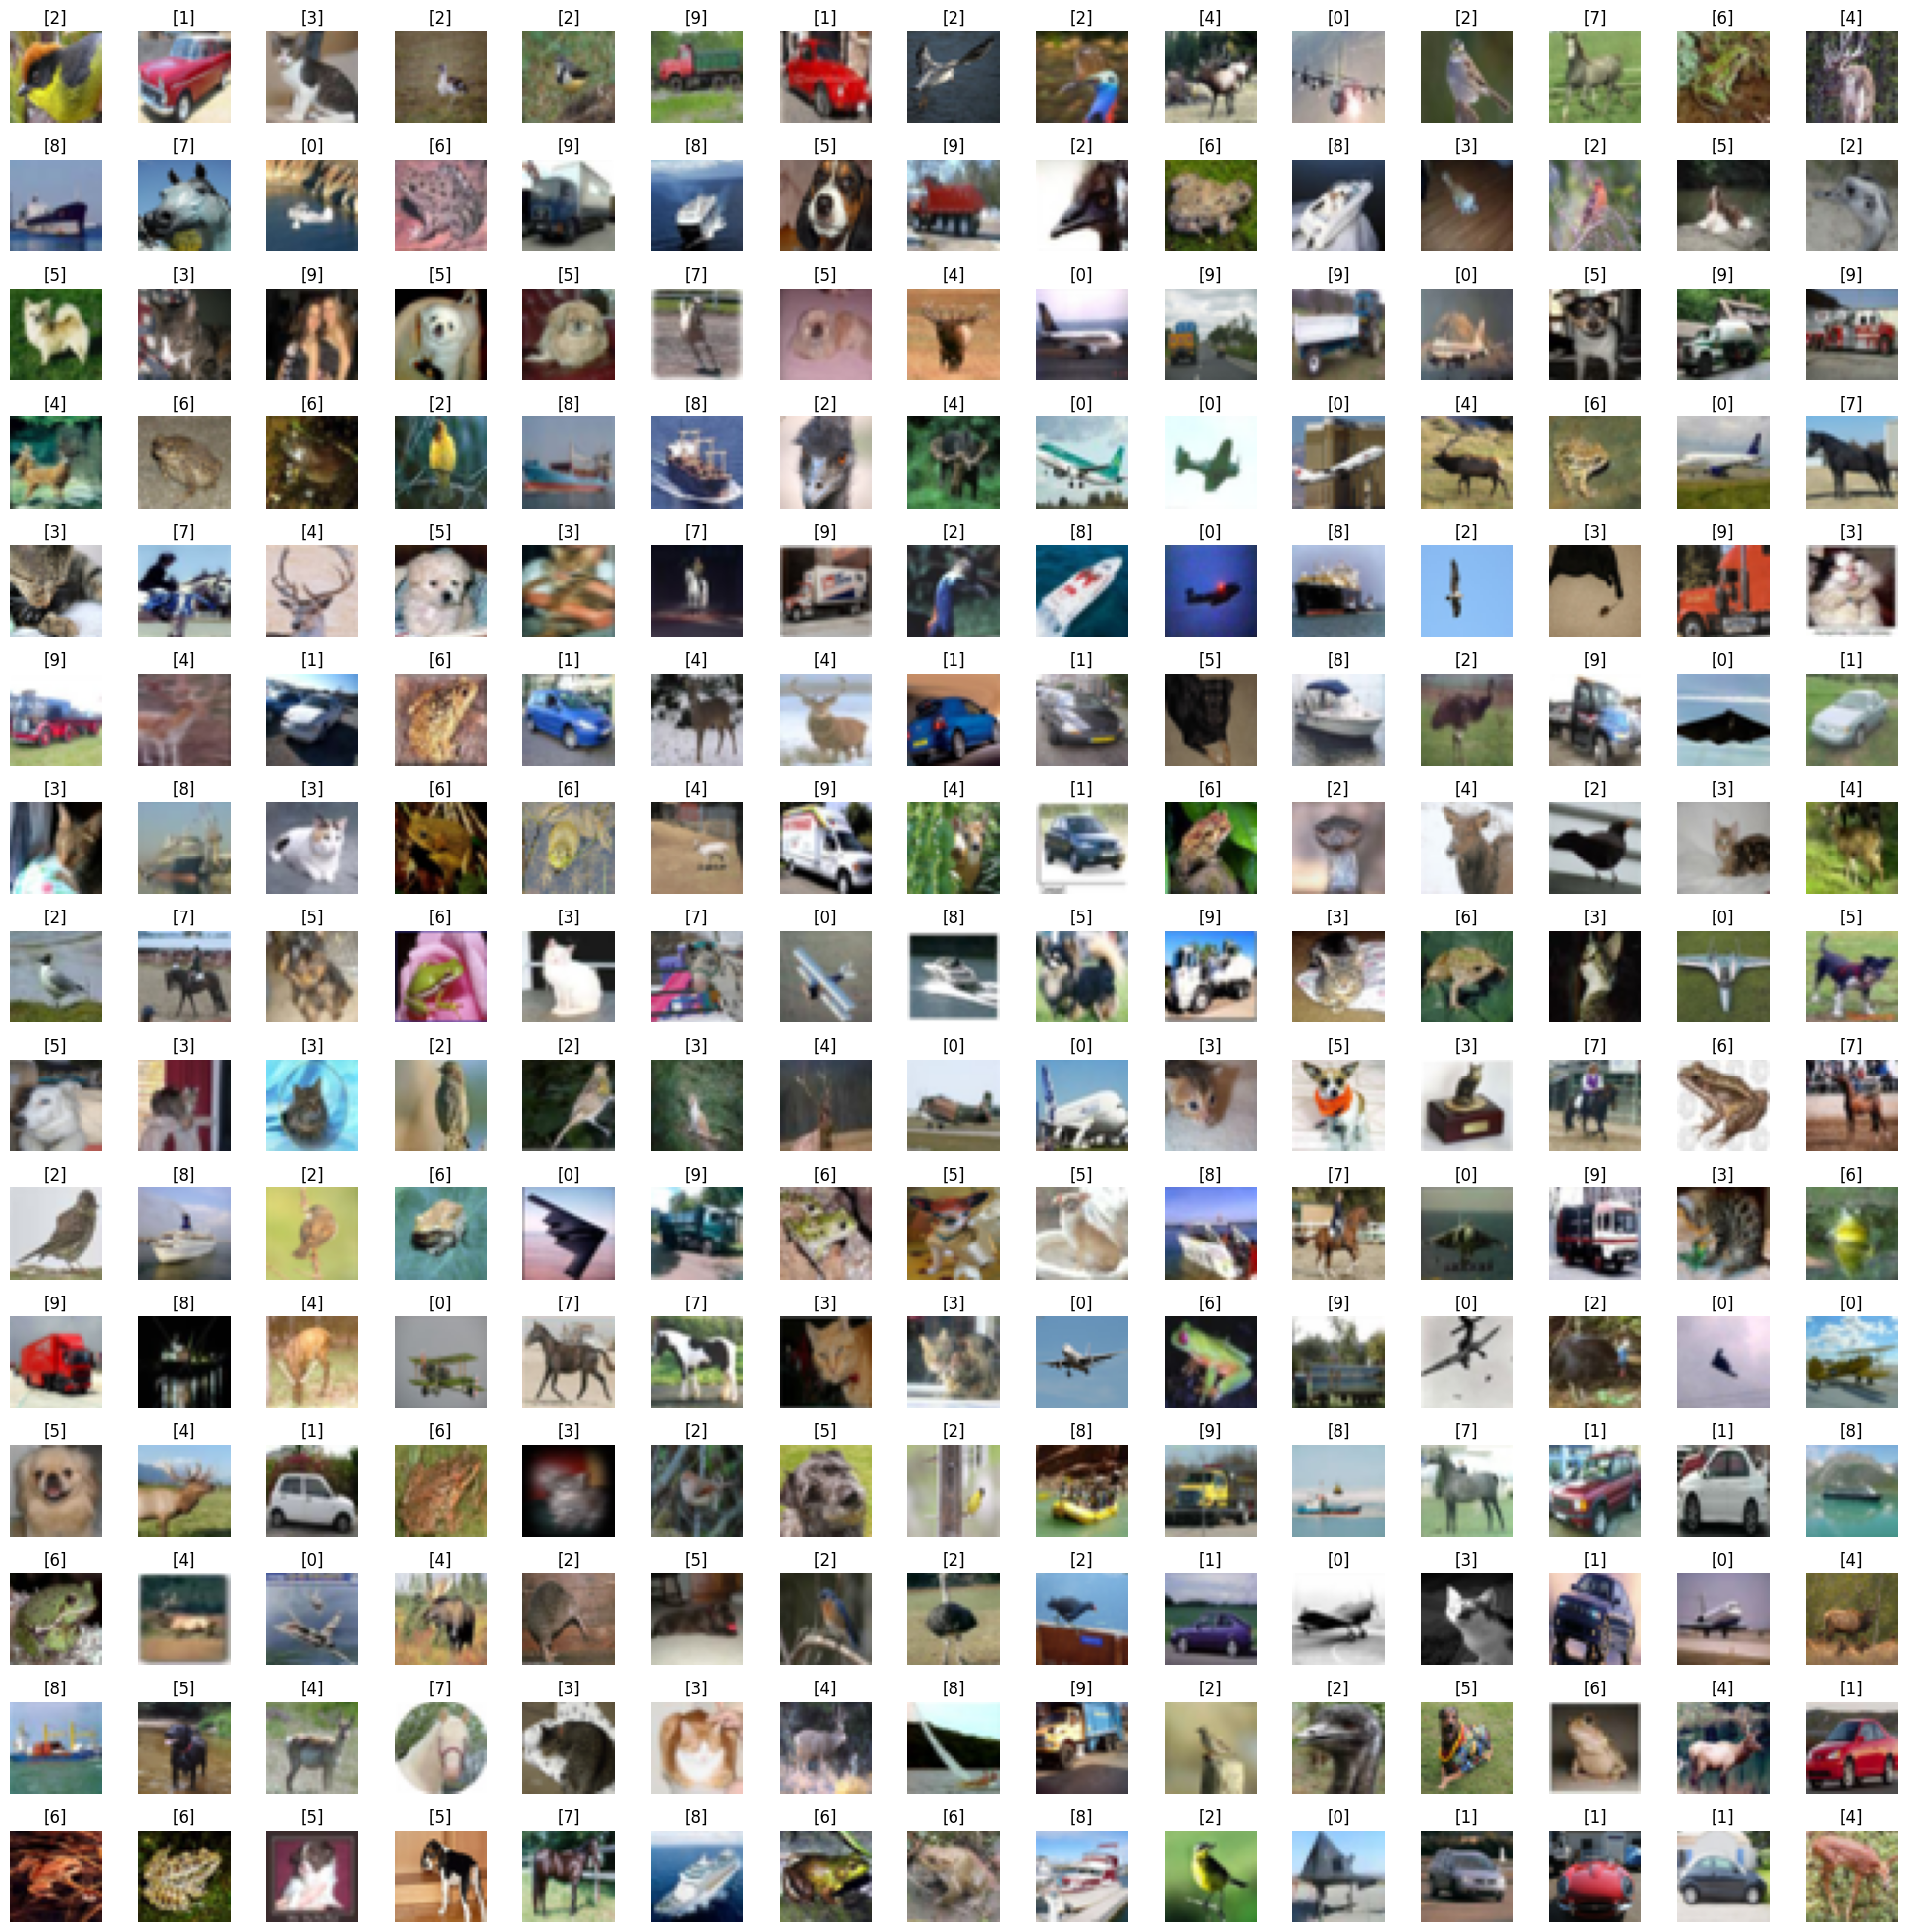

In [21]:
L_grid = 15
W_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])

plt.subplots_adjust(hspace=0.4)

### 3. Data Preparation

### 4. Model Training

### 5. Model Evaluation

### 6. Saving The Model

### 7. Improving The Model With Data Augmentation

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

#### 7.1. Data Augmentation for the CIFAR-10 dataset

#### 7.2. Model training using augmented dataset

#### 8. References

This tech report (Chapter 3) describes the dataset and the methodology followed when collecting it in much greater detail.

[Learning Multiple Layers of Features from Tiny Images](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf), Alex Krizhevsky, 2009.